# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
> 데이터 처리와 분석을 위한 라이브러리

- [Install Pandas](https://pandas.pydata.org/docs/getting_started/index.html) 

In [ ]:
import numpy as np
import pandas as pd

## 함수
- [타이타닉 데이터 로드](https://www.kaggle.com/c/titanic/)

In [ ]:
# from google.colab import drive
# drive.mount('/content/data')

In [ ]:
# DATA_PATH = "/content/data/MyDrive/lecture//data/"

In [ ]:
# df = pd.read_csv(DATA_PATH+"Titanic.csv")

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

df = sns.load_dataset('titanic') # 타이타닉 데이터 받아오기

### 데이터 조회

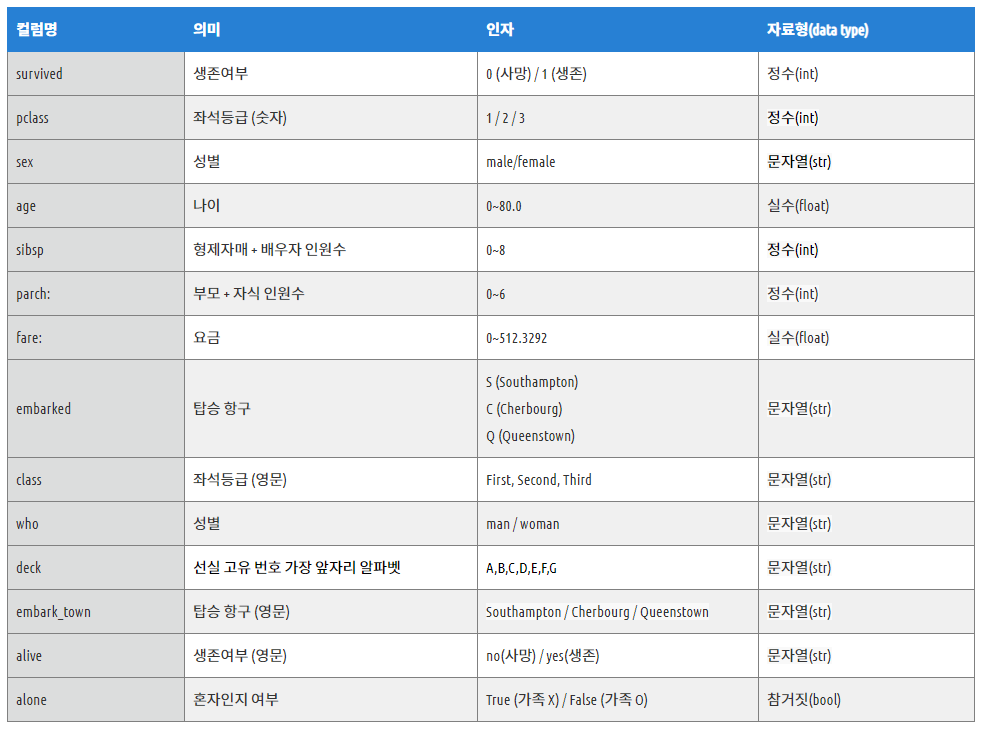

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### null 확인

In [ ]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() # 컬럼별 널 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.isnull().sum().sum() # 전체 널 확인 

869

In [ ]:
df.info() # 전체 수, null이 있는 컬럼, 데이터 타입 등을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### [통계](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics)
> count(), sum(), mean(), median(), min(), max(), abs(), std() 등

In [ ]:
df_number = df.select_dtypes(include=np.number)
df_object = df.select_dtypes(exclude=np.number)

In [ ]:
df.shape

(891, 15)

In [ ]:
df_number.shape # (로우, 컬럼)

(891, 6)

In [ ]:
print(f'df.shape: {df.shape} / df_number.shape: {df_number.shape}')

df.shape: (891, 15) / df_number.shape: (891, 6)


In [ ]:
print(f'df.shape: {df.shape} / df_number["age"].shape: {df_number["age"].shape}')

df.shape: (891, 15) / df_number["age"].shape: (891,)


In [ ]:
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
df_number['age'].median() # Series의 통계값을 얻을 수 있음

28.0

In [ ]:
df_number.mean() # DataFrame에서 사용하면 컬럼별 통계값을 얻을 수 있음

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [ ]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
df_number.mean(1) # 숫자1을 인풋파람에 넣으면, 로우 기준으로 통계값을 얻을 수 있음

0       5.541667
1      18.713883
2       6.320833
3      15.183333
4       7.675000
         ...    
886     7.000000
887     8.500000
888     5.890000
889     9.666667
890     7.125000
Length: 891, dtype: float64

In [ ]:
df_number.max() - (df_number.std() + df_number.min()) # 가장 큰수 - (표준편차 + 가장 작은 수)

survived      0.513408
pclass        1.163929
age          65.053503
sibsp         6.897257
parch         5.193943
fare        462.635771
dtype: float64

In [ ]:
df_number.var() # 분산

survived       0.236772
pclass         0.699015
age          211.019125
sibsp          1.216043
parch          0.649728
fare        2469.436846
dtype: float64

value_counts()

In [ ]:
df_object.columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df_object['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [ ]:
df_object['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

unique(), nunique()

In [ ]:
df_object['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df_object['class'].nunique()

3

describe()을 이용하면 전체 통계값을 얻을 수 있음

In [ ]:
df.describe(include='all') # 수 & 카테고리 데이터 전부에 대한 통계값들

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include=np.number) # 수에 대한 통계값들

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(exclude=np.number) # 카테고리 데이터에 대한 통계값들

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [ ]:
df['adult_male'].describe() # Series에서도 사용가능

count      891
unique       2
top       True
freq       537
Name: adult_male, dtype: object

### map(), apply()

#### map()

In [ ]:
x = pd.Series({'one':1,'two':2,'three':3})
y = pd.Series({1:'triangle',2:'square',3:'circle'})

In [ ]:
x

one      1
two      2
three    3
dtype: int64

In [ ]:
y

1    triangle
2      square
3      circle
dtype: object

In [ ]:
x.map(y)

one      triangle
two        square
three      circle
dtype: object

In [ ]:
y

1    triangle
2      square
3      circle
dtype: object

In [ ]:
x

one      1
two      2
three    3
dtype: int64

In [ ]:
y.map(x)

1   NaN
2   NaN
3   NaN
dtype: float64

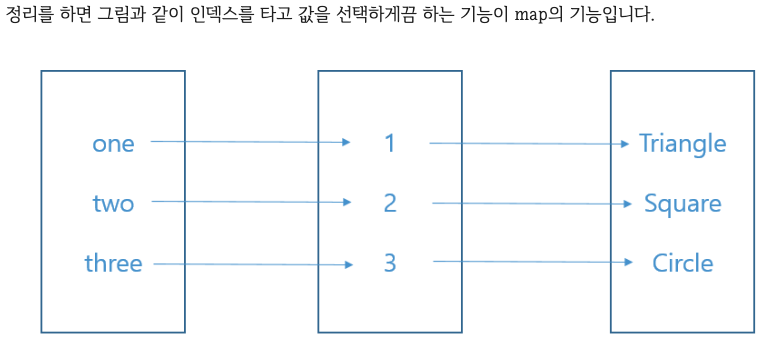

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['sex'][:5]

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [ ]:
replace_dict = {"male":1, "female":0}
df['sex'].map(replace_dict)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [ ]:
df['sex'][:5]

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [ ]:
# replace_dict = {"male":1, "female":0}
df['sex'].map(lambda value: 1 if value == 'male' else 0)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

#### apply()

In [ ]:
df_tmp = pd.DataFrame(np.arange(12).reshape(4,3),columns=['a','b','c'])
df_tmp

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [ ]:
df_tmp['a'].apply(lambda x:x*2) # Series에 적용

0     0
1     6
2    12
3    18
Name: a, dtype: int64

In [ ]:
df_tmp

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [ ]:
df_tmp.apply(lambda x:x.sum()) # column 합계

a    18
b    22
c    26
dtype: int64

In [ ]:
df_tmp.apply(lambda x:x.sum(), axis=1) # row 합계

0     3
1    12
2    21
3    30
dtype: int64

In [ ]:
df_tmp['row_sum'] = df_tmp.apply(lambda x:x.sum(), axis=1)
df_tmp 

,a,b,c,row_sum
0,0,1,2,3
1,3,4,5,12
2,6,7,8,21
3,9,10,11,30


In [ ]:
df_tmp['a+2'] = df_tmp.apply(lambda x:x['a']+2, axis=1)
df_tmp 

,a,b,c,row_sum,a+2
0,0,1,2,3,2
1,3,4,5,12,5
2,6,7,8,21,8
3,9,10,11,30,11


In [ ]:
def tmpFnc(a,b):
  return a+b

df_tmp['a+b'] = df_tmp.apply(lambda x:tmpFnc(x['a'], x['b']), axis=1)
df_tmp 

,a,b,c,row_sum,a+2,a+b
0,0,1,2,3,2,1
1,3,4,5,12,5,7
2,6,7,8,21,8,13
3,9,10,11,30,11,19


### 집합

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
select_cols = ['age', 'sex', 'pclass', 'fare', 'survived']
df_groupby = df[select_cols]
df_groupby.head()

,age,sex,pclass,fare,survived
0,22.0,male,3,7.2500,0
1,38.0,female,1,71.2833,1
2,26.0,female,3,7.9250,1
3,35.0,female,1,53.1000,1
4,35.0,male,3,8.0500,0


#### [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
> 데이터 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하는 것  

- 파라미터
  - data: 데이터프레임
  - values: 데이터로 사용할 열
  - index: 행으로 사용할 열
  - columns: 열로 사용할 열
  - aggfunc: 데이터 집계함수

In [ ]:
df_groupby.columns

Index(['age', 'sex', 'pclass', 'fare', 'survived'], dtype='object')

In [ ]:
df_groupby.head()

,age,sex,pclass,fare,survived
0,22.0,male,3,7.2500,0
1,38.0,female,1,71.2833,1
2,26.0,female,3,7.9250,1
3,35.0,female,1,53.1000,1
4,35.0,male,3,8.0500,0


In [ ]:
df_groupby.describe()

,age,pclass,fare,survived
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,2.308642,32.204208,0.383838
std,14.526497,0.836071,49.693429,0.486592
min,0.420000,1.000000,0.000000,0.000000
25%,20.125000,2.000000,7.910400,0.000000
50%,28.000000,3.000000,14.454200,0.000000
75%,38.000000,3.000000,31.000000,1.000000
max,80.000000,3.000000,512.329200,1.000000


In [ ]:
pd.pivot_table(df_groupby, index='sex', columns='pclass', values='age', aggfunc='mean')

pclass,1,2,3
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [ ]:
pd.pivot_table(df_groupby, index='sex', columns='pclass', values='fare', aggfunc=['min', 'max'])

min                   max             
pclass        1     2     3         1     2      3
sex                                               
female  25.9292  10.5  6.75  512.3292  65.0  69.55
male     0.0000   0.0  0.00  512.3292  73.5  69.55

#### groupby

In [ ]:
grouped = df_groupby.groupby(['sex'])

In [ ]:
for i in grouped:
  print(type(i))

<class 'tuple'>
<class 'tuple'>


In [ ]:
for key, group in grouped:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key female
* count 314
    age     sex  pclass     fare  survived
1  38.0  female       1  71.2833         1
2  26.0  female       3   7.9250         1
3  35.0  female       1  53.1000         1
8  27.0  female       3  11.1333         1
9  14.0  female       2  30.0708         1


* key male
* count 577
    age   sex  pclass     fare  survived
0  22.0  male       3   7.2500         0
4  35.0  male       3   8.0500         0
5   NaN  male       3   8.4583         0
6  54.0  male       1  51.8625         0
7   2.0  male       3  21.0750         0




In [ ]:
grouped.mean()

,age,pclass,fare,survived
sex,,,,
female,27.915709,2.159236,44.479818,0.742038
male,30.726645,2.389948,25.523893,0.188908


In [ ]:
grouped.median()

,age,pclass,fare,survived
sex,,,,
female,27.0,2.0,23.0,1.0
male,29.0,3.0,10.5,0.0


In [ ]:
group_female = grouped.get_group('female')
group_female.head()

,age,sex,pclass,fare,survived
1,38.0,female,1,71.2833,1
2,26.0,female,3,7.9250,1
3,35.0,female,1,53.1000,1
8,27.0,female,3,11.1333,1
9,14.0,female,2,30.0708,1


여러 컬럼을 기준으로 집합

In [ ]:
grouped = df_groupby.groupby(['sex','pclass'])

In [ ]:
for key, group in grouped:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key ('female', 1)
* count 94
     age     sex  pclass      fare  survived
1   38.0  female       1   71.2833         1
3   35.0  female       1   53.1000         1
11  58.0  female       1   26.5500         1
31   NaN  female       1  146.5208         1
52  49.0  female       1   76.7292         1


* key ('female', 2)
* count 76
     age     sex  pclass     fare  survived
9   14.0  female       2  30.0708         1
15  55.0  female       2  16.0000         1
41  27.0  female       2  21.0000         0
43   3.0  female       2  41.5792         1
53  29.0  female       2  26.0000         1


* key ('female', 3)
* count 144
     age     sex  pclass     fare  survived
2   26.0  female       3   7.9250         1
8   27.0  female       3  11.1333         1
10   4.0  female       3  16.7000         1
14  14.0  female       3   7.8542         0
18  31.0  female       3  18.0000         0


* key ('male', 1)
* count 122
     age   sex  pclass      fare  survived
6   54.0  male       1   51.8

In [ ]:
grouped.mean()

age        fare  survived
sex    pclass                                 
female 1       34.611765  106.125798  0.968085
       2       28.722973   21.970121  0.921053
       3       21.750000   16.118810  0.500000
male   1       41.281386   67.226127  0.368852
       2       30.740707   19.741782  0.157407
       3       26.507589   12.661633  0.135447

#### agg

In [ ]:
df_groupby.head()

,age,sex,pclass,fare,survived
0,22.0,male,3,7.2500,0
1,38.0,female,1,71.2833,1
2,26.0,female,3,7.9250,1
3,35.0,female,1,53.1000,1
4,35.0,male,3,8.0500,0


In [ ]:
df_groupby['fare'].agg(['sum', 'mean'])

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64

In [ ]:
df_groupby['fare'].agg(lambda x:x.sum())

28693.9493

groupby()와 같이 사용

In [ ]:
grouped = df_groupby.groupby(['sex'])

In [ ]:
grouped.agg(['min', 'max'])

age       pclass      fare           survived    
         min   max    min max   min       max      min max
sex                                                       
female  0.75  63.0      1   3  6.75  512.3292        0   1
male    0.42  80.0      1   3  0.00  512.3292        0   1

In [ ]:
agg_dict = {
    'fare': ['min', 'max'],
    'age': 'mean'
}

agg_dict

{'fare': ['min', 'max'], 'age': 'mean'}

In [ ]:
grouped.agg(agg_dict)

fare                  age
        min       max       mean
pclass                          
1       0.0  512.3292  38.233441
2       0.0   73.5000  29.877630
3       0.0   69.5500  25.140620

In [ ]:
def min_max(x):
  return x.max() - x.min()

grouped.agg(min_max)

,age,pclass,fare,survived
sex,,,,
female,62.25,2,505.5792,1
male,79.58,2,512.3292,1


#### transform()
> 그룹별로 매핑함수를 적용하긴 하지만, 그룹별로 집계하지 않고 원래 데이터프레임의 형태로 반환함. 

아래는 그룹별 데이터를 조회할 때, 일반적인 방법과 transform()를 이용한 방법이다.

In [ ]:
grouped = df_groupby.groupby(['pclass'])

In [ ]:
age_mean = grouped.age.mean()
age_std = grouped.age.std()

for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]
    print("* origin :", key)
    print(group_zscore.head(3))
    print('\n')

* origin : 1
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : 2
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : 3
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64




하기와 같이 transform은 그룹을 기준으로 연산을 하고 그 결과는 다시 원래 데이터프레임의 형태로 반환한다.

In [ ]:
def z_score(x):
    return (x - x.mean())/ x.std()

# tmp = 'age'
# df_transform = grouped[tmp]transform(z_score)
df_transform = grouped.age.transform(z_score)
print(df_transform.iloc[[1,3,6]])
print(df_transform.iloc[[9,15,17]])
print(df_transform.iloc[[0,2,4]])

1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64


#### 기타 응용

In [ ]:
test = grouped.filter(lambda x : x.age.mean() < 30) # 그룹별 나이평균이 30미만인 그룹만 조회
print(test.head())
print(test['pclass'].unique())

    age     sex  pclass     fare  survived
0  22.0    male       3   7.2500         0
2  26.0  female       3   7.9250         1
4  35.0    male       3   8.0500         0
5   NaN    male       3   8.4583         0
7   2.0    male       3  21.0750         0
[3 2]


In [ ]:
grouped.apply(lambda x : x.describe()) # 그룹별 통계정보

age  pclass        fare    survived
pclass                                                  
1      count  186.000000   216.0  216.000000  216.000000
       mean    38.233441     1.0   84.154687    0.629630
       std     14.802856     0.0   78.380373    0.484026
       min      0.920000     1.0    0.000000    0.000000
       25%     27.000000     1.0   30.923950    0.000000
       50%     37.000000     1.0   60.287500    1.000000
       75%     49.000000     1.0   93.500000    1.000000
       max     80.000000     1.0  512.329200    1.000000
2      count  173.000000   184.0  184.000000  184.000000
       mean    29.877630     2.0   20.662183    0.472826
       std     14.001077     0.0   13.417399    0.500623
       min      0.670000     2.0    0.000000    0.000000
       25%     23.000000     2.0   13.000000    0.000000
       50%     29.000000     2.0   14.250000    0.000000
       75%     36.000000     2.0   26.000000    1.000000
       max     70.000000     2.0   73.500000    1.000000
3      count  355.000000   491.0  491.000000  491.000000
       mean    25.140620     3.0   13.675550    0.242363
       std     12.495398     0.0   11.778142    0.428949
       min      0.420000     3.0    0.000000    0.000000
       25%     18.000000     3.0    7.750000    0.000000
       50%     24.000000     3.0    8.050000    0.000000
       75%     32.000000     3.0   15.500000    0.000000
       max     74.000000     3.0   69.550000    1.000000